# Part 1
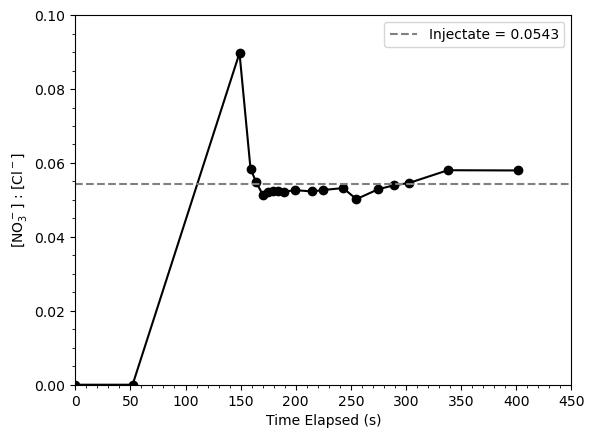

**Fig. 1** Ratio of NO3- concentration to background-corrected Cl- concentration over the duration of the experiment. Injectate with a ratio of 0.0543 was added to the supraglacial channel and is shown as a dashed gray line. About 150 seconds after injection, a spike in the concentration ratio can be observed. This spike likely indicates injectate that was quickly transported without experienceing nutrient spiraling. Immediatly after this, the ratio begins to decrease again. The ratio is lower than the injectate for a sustained period between about 170 and 300 seconds. This indicates that N is being lost to the system and net uptake is occurring during this period. After this, the ratio begins to plateau at a value of approximately 0.058. This is higher than the injectate ratio, which indicates that N uptake is no longer occurring.

# Part 2
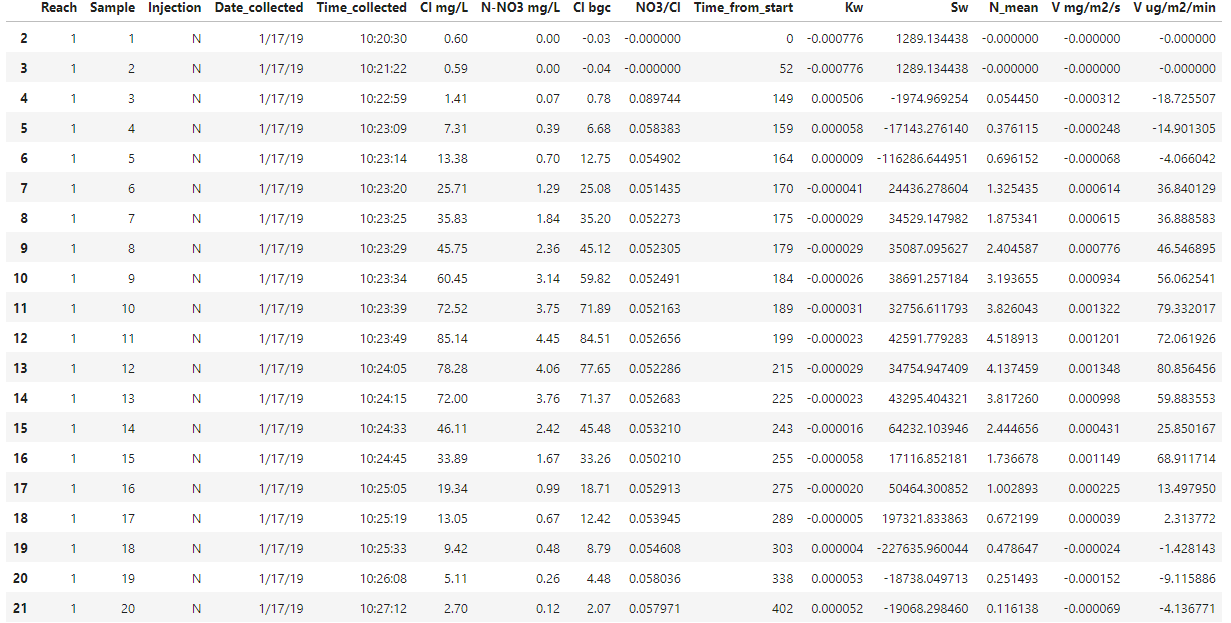
**Table 1** Original data and uptake rate calculations.


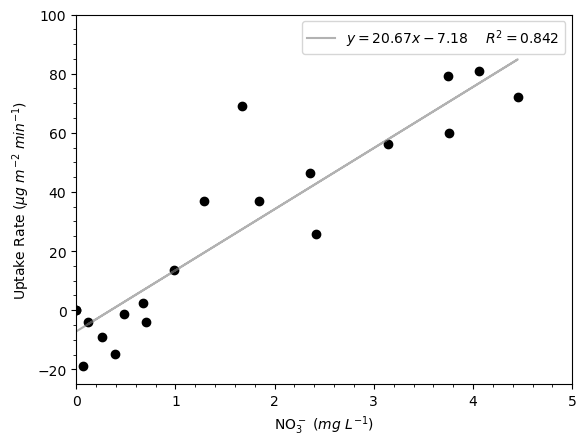

**Fig. 2** Uptake rate as a function of NO3- concentration. A linear regression was performed and is displayed as a gray line. This regression indicates that uptake rate increases proportionally to NO3- concentration. This indicates that increasing levels of N saturation leads to an increased rate of uptake, likely due to increased exposure between N and stream sediments.

# Code for Generating Figures

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
#Import data
df = pd.read_csv('Reach1_N_blank.csv')
df_bg = pd.concat([df.head(2), df.tail(2)])
df = df.iloc[2:22, :]
df

,Reach,Sample,Injection,Date_collected,Time_collected,Cl mg/L,N-NO3 mg/L
2,1,1,N,1/17/19,10:20:30,0.60,0.00
3,1,2,N,1/17/19,10:21:22,0.59,0.00
4,1,3,N,1/17/19,10:22:59,1.41,0.07
5,1,4,N,1/17/19,10:23:09,7.31,0.39
6,1,5,N,1/17/19,10:23:14,13.38,0.70
7,1,6,N,1/17/19,10:23:20,25.71,1.29
8,1,7,N,1/17/19,10:23:25,35.83,1.84
9,1,8,N,1/17/19,10:23:29,45.75,2.36
10,1,9,N,1/17/19,10:23:34,60.45,3.14
11,1,10,N,1/17/19,10:23:39,72.52,3.75


In [4]:
df_bg

,Reach,Sample,Injection,Date_collected,Time_collected,Cl mg/L,N-NO3 mg/L
0,1,Bottom BG1,N,1/17/19,9:30:00,0.61,0.0
1,1,Top BG1,N,1/17/19,9:35:00,0.64,0.0
22,1,Bottom BG2,N,1/17/19,10:53:00,0.65,0.0
23,1,Top BG2,N,1/17/19,10:56:00,0.62,0.0


In [5]:
Cl_bg_mean = df_bg['Cl mg/L'].mean()
print(Cl_bg_mean)
df['Cl bgc'] = df['Cl mg/L']-Cl_bg_mean
df['NO3/Cl'] = df['N-NO3 mg/L']/df['Cl bgc']

time_s = pd.Timestamp(df.at[2, 'Time_collected'])
df['Time_from_start'] = df['Time_collected'].apply(lambda x: (pd.Timestamp(x)-time_s).seconds)
df

0.63


,Reach,Sample,Injection,Date_collected,Time_collected,Cl mg/L,N-NO3 mg/L,Cl bgc,NO3/Cl,Time_from_start
2,1,1,N,1/17/19,10:20:30,0.60,0.00,-0.03,-0.000000,0
3,1,2,N,1/17/19,10:21:22,0.59,0.00,-0.04,-0.000000,52
4,1,3,N,1/17/19,10:22:59,1.41,0.07,0.78,0.089744,149
5,1,4,N,1/17/19,10:23:09,7.31,0.39,6.68,0.058383,159
6,1,5,N,1/17/19,10:23:14,13.38,0.70,12.75,0.054902,164
7,1,6,N,1/17/19,10:23:20,25.71,1.29,25.08,0.051435,170
8,1,7,N,1/17/19,10:23:25,35.83,1.84,35.20,0.052273,175
9,1,8,N,1/17/19,10:23:29,45.75,2.36,45.12,0.052305,179
10,1,9,N,1/17/19,10:23:34,60.45,3.14,59.82,0.052491,184
11,1,10,N,1/17/19,10:23:39,72.52,3.75,71.89,0.052163,189


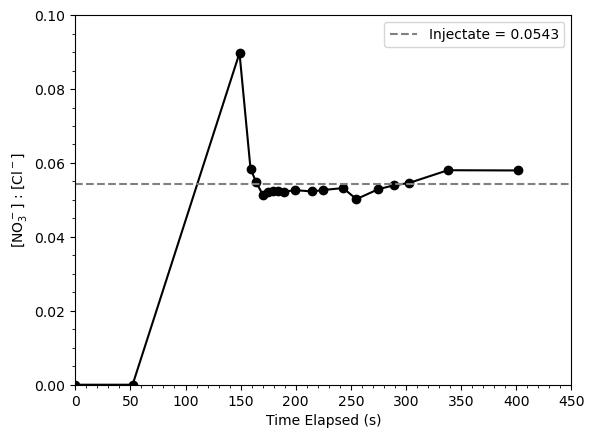

In [66]:
plt.plot(df['Time_from_start'], df['NO3/Cl'], color='black', marker = 'o')
plt.plot([0,450], [0.0543,0.0543], color='gray', linestyle='--', label='Injectate = 0.0543')
plt.xlabel('Time Elapsed (s)')
plt.ylabel('[NO$_3^-$] : [Cl$^-$]')
plt.ylim(0,.1)
plt.xlim(0, 450)
plt.minorticks_on()
plt.legend()

In [7]:
Q = 2.83 #L/s
width = 0.25 #m
r_leng = 70 #m
N_Cl_ratio = 0.0543
df['Kw'] = ((df['N-NO3 mg/L']/df['Cl bgc'])-N_Cl_ratio)/r_leng
df['Sw'] = -1/df['Kw']
df['N_mean'] = (df['N-NO3 mg/L']*N_Cl_ratio*df['Cl bgc'])**0.5
df['V mg/m2/s'] = Q*df['N_mean']/(df['Sw']*width)
df['V ug/m2/min'] = df['V mg/m2/s']*1000*60

df

,Reach,Sample,Injection,Date_collected,Time_collected,Cl mg/L,N-NO3 mg/L,Cl bgc,NO3/Cl,Time_from_start,Kw,Sw,N_mean,V mg/m2/s,V ug/m2/min
2,1,1,N,1/17/19,10:20:30,0.60,0.00,-0.03,-0.000000,0,-0.000776,1289.134438,-0.000000,-0.000000,-0.000000
3,1,2,N,1/17/19,10:21:22,0.59,0.00,-0.04,-0.000000,52,-0.000776,1289.134438,-0.000000,-0.000000,-0.000000
4,1,3,N,1/17/19,10:22:59,1.41,0.07,0.78,0.089744,149,0.000506,-1974.969254,0.054450,-0.000312,-18.725507
5,1,4,N,1/17/19,10:23:09,7.31,0.39,6.68,0.058383,159,0.000058,-17143.276140,0.376115,-0.000248,-14.901305
6,1,5,N,1/17/19,10:23:14,13.38,0.70,12.75,0.054902,164,0.000009,-116286.644951,0.696152,-0.000068,-4.066042
7,1,6,N,1/17/19,10:23:20,25.71,1.29,25.08,0.051435,170,-0.000041,24436.278604,1.325435,0.000614,36.840129
8,1,7,N,1/17/19,10:23:25,35.83,1.84,35.20,0.052273,175,-0.000029,34529.147982,1.875341,0.000615,36.888583
9,1,8,N,1/17/19,10:23:29,45.75,2.36,45.12,0.052305,179,-0.000029,35087.095627,2.404587,0.000776,46.546895
10,1,9,N,1/17/19,10:23:34,60.45,3.14,59.82,0.052491,184,-0.000026,38691.257184,3.193655,0.000934,56.062541
11,1,10,N,1/17/19,10:23:39,72.52,3.75,71.89,0.052163,189,-0.000031,32756.611793,3.826043,0.001322,79.332017


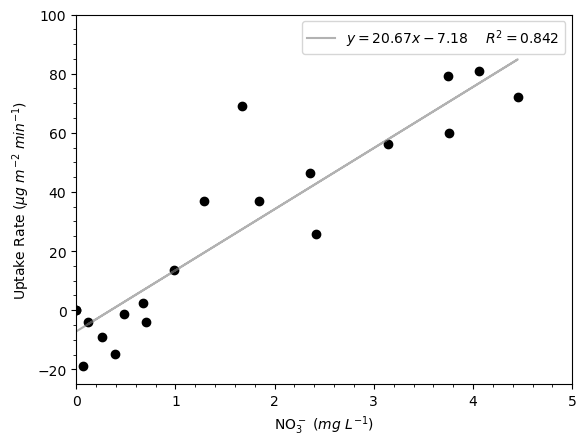

In [65]:
x=df['N-NO3 mg/L'].values.reshape(-1,1)
y=df['V ug/m2/min'].values.reshape(-1,1)

model = LinearRegression()
model.fit(x,y)
y_model=model.predict(x)
r2=model.score(x,y)
lbl = '$y={coef:.2f}x{intcpt:.2f}$    $R^2={r2:.3f}$'
lbl = lbl.format(coef = model.coef_[0][0], intcpt=model.intercept_[0],r2=r2)

#plt.plot([0,5],[0,0], color='k', linewidth=.6)
plt.scatter(x, y, color='black')
plt.plot(x,y_model, color='grey', alpha=0.6, label=lbl)
plt.xlabel('NO$_3^-$ ($mg$ $L^{-1}$)')
plt.ylabel('Uptake Rate ($µg$ $m^{-2}$ $min^{-1}$)')
plt.xlim(0,5)
plt.ylim(-25,100)
plt.minorticks_on()
plt.legend()